In [1129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
import contextily as cx
import matplotlib.ticker as mticker
import glob

import os

In [1130]:
import warnings
warnings.filterwarnings("ignore")

# Import the data

In [1131]:
# read folder names

main_folder = './../../data-raw'

In [1132]:
for subfolders in [name for name in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, name))]:
    print(subfolders)

2024-10-07_13-43-52
2024-10-07_13-54-11
2024-10-07_12-14-04
2024-10-09_10-56-04
2024-03-03_15-31-14
2024-10-09_10-38-46
2024-10-09_11-21-45


In [1133]:
file_name = '2024-10-07_13-43-52'
#file_name = '2024-10-09_11-21-45'

In [1134]:

"""
# Read all csv files from folder

df = pd.DataFrame()
for file_name in glob.glob('./../../data-raw/'+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    df = pd.concat([df,x],axis=0)
"""

"\n# Read all csv files from folder\n\ndf = pd.DataFrame()\nfor file_name in glob.glob('./../../data-raw/'+'*.csv'):\n    x = pd.read_csv(file_name, low_memory=False)\n    df = pd.concat([df,x],axis=0)\n"

In [1135]:
acc = pd.read_csv('./../../data-raw/' + file_name + '/Accelerometer.csv',sep=',',header=0,names=['time','seconds_elapsed','acc_z','acc_y','acc_x'])
gyr = pd.read_csv('./../../data-raw/' + file_name + '/Gyroscope.csv',sep=',',header=0,names=['time','seconds_elapsed','gyr_z','gyr_y','gyr_x'])
loc = pd.read_csv('./../../data-raw/' + file_name + '/Location.csv',sep=',')

df = pd.concat([acc, gyr[['gyr_z','gyr_y','gyr_x']]], axis=1) #Concat the vibration data """, mag[['mag_z','mag_y','mag_x']]"""

In [1136]:
loc = loc.rename(columns={'latitude':'lat','longitude':'lon'})

In [1137]:
df

,time,seconds_elapsed,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x
0,1728308632440973800,0.041974,-0.029254,0.567370,0.097078,-0.009864,0.020803,-0.058689
1,1728308632451032800,0.052033,0.271404,0.167120,-0.019195,-0.012692,0.000729,-0.039225
2,1728308632461091800,0.062092,0.867319,0.592851,0.396462,-0.010246,-0.004729,-0.034575
3,1728308632471150800,0.072151,1.753303,0.191661,0.395497,-0.023085,-0.048511,-0.006857
4,1728308632481209900,0.082210,1.725697,0.622213,0.904634,-0.016330,-0.034755,0.002889
...,...,...,...,...,...,...,...,...
58133,1728309217260347400,584.861347,0.331147,-0.260900,-0.047103,0.000791,0.001433,0.000284
58134,1728309217270408400,584.871408,-0.113264,-0.223131,-0.032413,-0.001662,-0.008290,-0.005138
58135,1728309217280468200,584.881468,-0.062076,-0.187535,0.041529,0.000911,0.000652,-0.003664
58136,1728309217290529300,584.891529,0.468356,-0.241097,-0.040222,0.002347,0.013936,0.004599


In [1138]:
df.describe()

,time,seconds_elapsed,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x
count,5.813800e+04,58138.000000,58138.000000,58138.000000,58138.000000,58138.000000,58138.000000,58138.000000
mean,1.728309e+18,292.464115,0.085219,0.047673,0.013364,-0.003584,-0.000002,-0.000095
std,1.688395e+11,168.839452,0.577753,0.660494,0.501384,0.062778,0.026785,0.024880
min,1.728309e+18,0.041974,-5.352279,-3.929075,-3.558100,-0.461268,-0.323744,-0.203976
25%,1.728309e+18,146.247515,-0.205826,-0.291905,-0.165102,-0.010909,-0.012299,-0.010339
50%,1.728309e+18,292.459574,0.087957,0.002664,-0.000521,-0.000566,-0.000185,-0.000038
75%,1.728309e+18,438.679593,0.375125,0.432015,0.176601,0.008089,0.012045,0.009521
max,1.728309e+18,584.901590,6.713678,3.550819,3.842279,0.388411,0.235571,0.180978


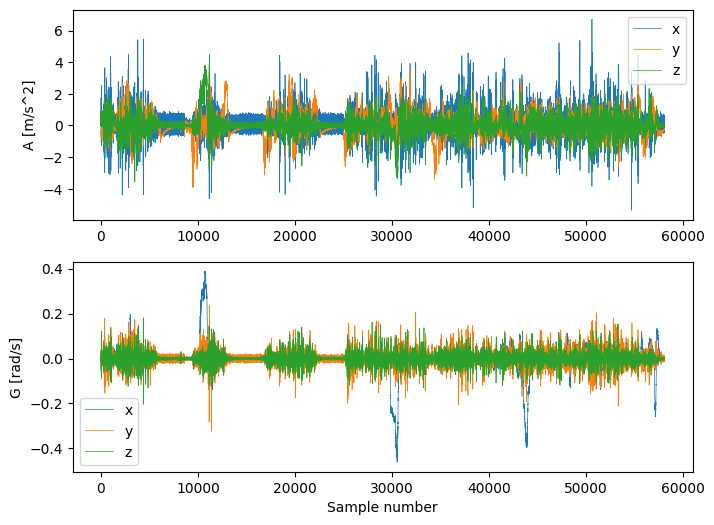

In [1139]:
import matplotlib as mpl
mpl.style.use('default')
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6))
ax1.plot(df[['acc_z', 'acc_y', 'acc_x']], linewidth=0.5)
ax1.set_ylabel('A [m/s^2]')
ax1.legend(['x','y','z'])
ax2.plot(df[['gyr_z', 'gyr_y', 'gyr_x']], linewidth=0.5)
ax2.set_ylabel('G [rad/s]')
ax2.set_xlabel('Sample number')
ax2.legend(['x','y','z'])

# Cleaning

### Interpolate the GPS data

In [1140]:
loc_new = pd.DataFrame()
fp = loc['seconds_elapsed'] #interpolaciohoz: ismert adatpontok helye
x = df['seconds_elapsed'] #interpolaciohoz: uj adatpontok helye

for j in ['lat','lon','speed']:
    xp = loc[j] #interpolaciohoz: eredeti y ertekek
    loc_new[j] = np.interp(x, fp, xp) 
    
df = pd.concat([df, loc_new], axis=1)
#df.rename(columns={"latitude":"lat", "longitude": "lon"}, inplace=True)

df.head()

,time,seconds_elapsed,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x,lat,lon,speed
0,1728308632440973800,0.041974,-0.029254,0.567370,0.097078,-0.009864,0.020803,-0.058689,46.834049,16.828913,-1.0
1,1728308632451032800,0.052033,0.271404,0.167120,-0.019195,-0.012692,0.000729,-0.039225,46.834051,16.828913,-1.0
2,1728308632461091800,0.062092,0.867319,0.592851,0.396462,-0.010246,-0.004729,-0.034575,46.834053,16.828914,-1.0
3,1728308632471150800,0.072151,1.753303,0.191661,0.395497,-0.023085,-0.048511,-0.006857,46.834055,16.828914,-1.0
4,1728308632481209900,0.082210,1.725697,0.622213,0.904634,-0.016330,-0.034755,0.002889,46.834057,16.828914,-1.0


### Trajectory smoothing

With Moving average

In [1141]:
def moving_average(x, N=100):
    padded = np.pad(x, (N//2, N-1-N//2), mode='edge')
    return np.convolve(padded, np.ones((N,))/N, mode='valid')

In [1142]:
smoothed_df = pd.DataFrame()
smoothed_df['lat'] = moving_average(df['lat'].copy().to_numpy())
smoothed_df['lon'] = moving_average(df['lon'].copy().to_numpy())

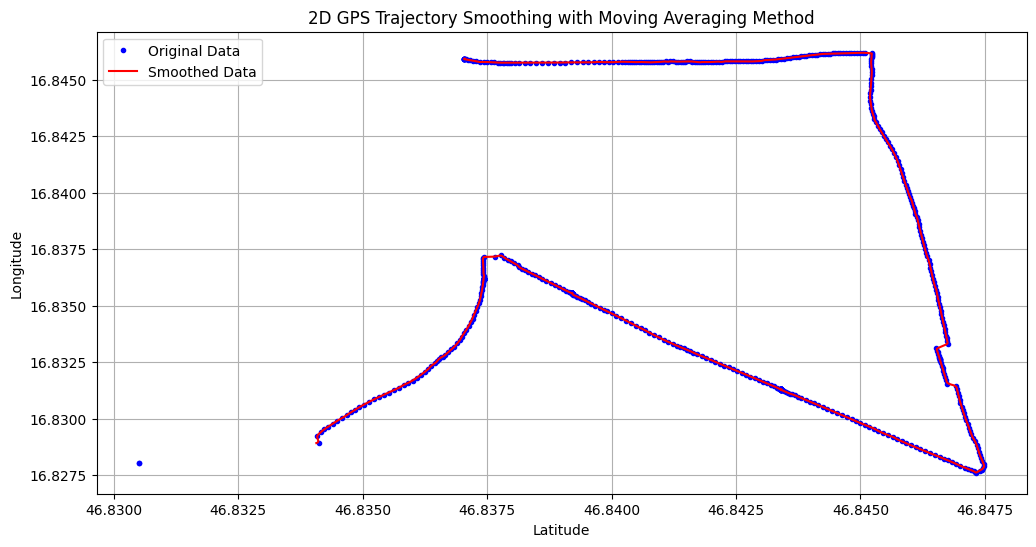

In [1143]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(loc['lat'], loc['lon'], 'b.', label='Original Data')
plt.plot(smoothed_df['lat'], smoothed_df['lon'], 'r-', label='Smoothed Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('2D GPS Trajectory Smoothing with Moving Averaging Method')
plt.grid(True)
plt.show()

In [1144]:
df.drop(labels=['lat','lon'], axis=1, inplace=True)
df = pd.concat([df, smoothed_df], axis=1)

df.head()

,time,seconds_elapsed,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x,speed,lat,lon
0,1728308632440973800,0.041974,-0.029254,0.567370,0.097078,-0.009864,0.020803,-0.058689,-1.0,46.834071,16.828919
1,1728308632451032800,0.052033,0.271404,0.167120,-0.019195,-0.012692,0.000729,-0.039225,-1.0,46.834072,16.828919
2,1728308632461091800,0.062092,0.867319,0.592851,0.396462,-0.010246,-0.004729,-0.034575,-1.0,46.834072,16.828920
3,1728308632471150800,0.072151,1.753303,0.191661,0.395497,-0.023085,-0.048511,-0.006857,-1.0,46.834073,16.828920
4,1728308632481209900,0.082210,1.725697,0.622213,0.904634,-0.016330,-0.034755,0.002889,-1.0,46.834074,16.828920


### Spatial resampling

In [1145]:
dDist = []
for j in np.arange(2,len(df)):
    d = abs(np.arccos(np.cos(np.deg2rad(90-df['lat'].loc[j-1])) * np.cos(np.deg2rad(90-df['lat'].loc[j])) + np.sin(np.deg2rad(90-df['lat'].loc[j-1])) * np.sin(np.deg2rad(90-df['lat'].loc[j]))) * np.cos(np.deg2rad(df['lon'].loc[j-1]-df['lon'].loc[j])) * 3958.76);
    dDist.append(d)
df_dDist = pd.DataFrame(dDist)
df_dDist.fillna(0,inplace=True) #remove the NaN values, introduced from the above calculation
df_dDist.isna().value_counts()

df_dDist[0].replace(0, 0.000001, inplace=True) #correct the count error

In [1146]:
fs = 5

summed = np.cumsum(df_dDist.to_numpy())*2200   #calculated the total travelled distance by cumsum function
uniqe_indexes = np.unique(summed,return_index=True)
x = np.arange(0,max(summed),1/fs)

# Then we use again the interp function to convert the time domain to the spatial domain
df_spatial = pd.DataFrame()
for j in ['acc_z','acc_y','acc_x','gyr_z','gyr_y','gyr_x','lat','lon','speed','time','seconds_elapsed']:
    xp = df[j]
    df_spatial[j] = np.interp(x,uniqe_indexes[0],xp[uniqe_indexes[1]])


In [1147]:
from scipy.interpolate import CubicSpline

In [1148]:
#df_spatial_spline = pd.DataFrame()
#for j in ['acc_z','acc_y','acc_x','gyr_z','gyr_y','gyr_x','lat','lon','speed','time','seconds_elapsed']:
#    xp = df[j][:-2]
#    cs = CubicSpline(summed,xp)
#    df_spatial_spline[j] = cs(x)

### Normalization

In [1149]:
from sklearn.preprocessing import normalize

In [1150]:
# do a min-max scaling in range (-1,1)
df_normalized = pd.DataFrame(normalize(df_spatial[['acc_z', 'acc_y', 'acc_x', 'gyr_z', 'gyr_y', 'gyr_x']], norm='max', axis=0))
df_normalized.columns = ['acc_z', 'acc_y', 'acc_x', 'gyr_z', 'gyr_y', 'gyr_x']

df_normalized['lat'] = df_spatial['lat']
df_normalized['lon'] = df_spatial['lon']
df_normalized['speed'] = df_spatial['speed']
df_normalized['time'] = df_spatial['time']
df_normalized['seconds_elapsed'] = df_spatial['seconds_elapsed']

# Feature extraction

In [1151]:
df_spatial.describe()

,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x,lat,lon,speed,time,seconds_elapsed
count,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,1.269900e+04,12699.000000
mean,0.083969,0.151158,0.067825,0.003901,0.000280,-0.000729,46.841273,16.836411,10.132475,1.728309e+18,288.700224
std,0.539259,0.622121,0.582300,0.065881,0.025613,0.027414,0.003695,0.006603,3.323226,1.780667e+11,178.066710
min,-3.910478,-3.154175,-2.849377,-0.446423,-0.248656,-0.176417,46.834071,16.827617,-1.000000,1.728309e+18,0.041974
25%,-0.173432,-0.189604,-0.167678,-0.011214,-0.013066,-0.014988,46.838385,16.830901,7.813650,1.728309e+18,178.325665
50%,0.091613,0.153503,0.011412,-0.000453,-0.000014,-0.000742,46.841153,16.833949,11.219122,1.728309e+18,274.728309
75%,0.342783,0.532173,0.199350,0.009848,0.013001,0.012213,46.844597,16.845757,12.566102,1.728309e+18,464.768689
max,5.291573,2.896380,3.755271,0.388237,0.165122,0.157147,46.847482,16.846194,14.485898,1.728309e+18,584.818858


In [1152]:
df_normalized.describe()

,acc_z,acc_y,acc_x,gyr_z,gyr_y,gyr_x,lat,lon,speed,time,seconds_elapsed
count,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,1.269900e+04,12699.000000
mean,0.015869,0.047923,0.018061,0.008738,0.001128,-0.004134,46.841273,16.836411,10.132475,1.728309e+18,288.700224
std,0.101909,0.197237,0.155062,0.147575,0.103007,0.155394,0.003695,0.006603,3.323226,1.780667e+11,178.066710
min,-0.739001,-1.000000,-0.758767,-1.000000,-1.000000,-1.000000,46.834071,16.827617,-1.000000,1.728309e+18,0.041974
25%,-0.032775,-0.060112,-0.044651,-0.025121,-0.052545,-0.084957,46.838385,16.830901,7.813650,1.728309e+18,178.325665
50%,0.017313,0.048667,0.003039,-0.001015,-0.000056,-0.004208,46.841153,16.833949,11.219122,1.728309e+18,274.728309
75%,0.064779,0.168720,0.053085,0.022060,0.052285,0.069228,46.844597,16.845757,12.566102,1.728309e+18,464.768689
max,1.000000,0.918269,1.000000,0.869662,0.664057,0.890770,46.847482,16.846194,14.485898,1.728309e+18,584.818858


### Spectrogram and Sum the Y axis

In [1153]:
from scipy import signal

(15.0, 40000.0)

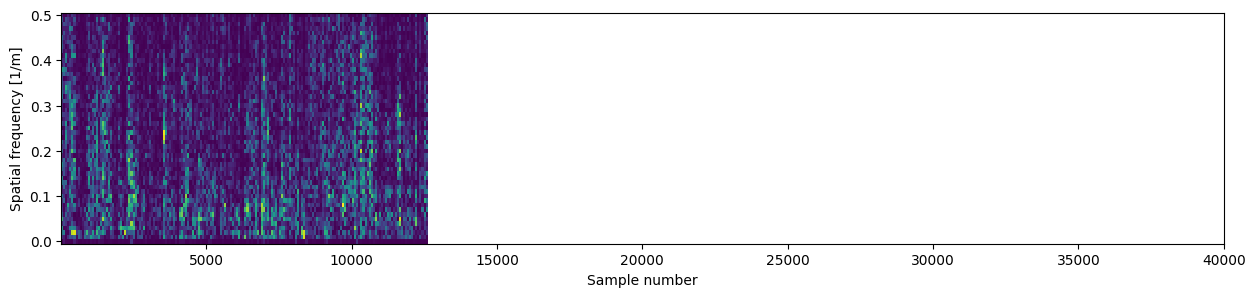

In [1154]:
f, t, Sxx = signal.spectrogram(df_spatial['acc_z'], 1, nperseg=100, noverlap=30)
plt.figure(figsize=(15,3))
plt.pcolormesh(t, f, Sxx, shading='nearest', rasterized=True, alpha=1, norm='asinh')

"""norm='symlog' --> A quasi-logarithmic scale based on the inverse hyperbolic sine (asinh)

    For values close to zero, this is essentially a linear scale,
    but for large magnitude values (either positive or negative)
    it is asymptotically logarithmic. The transition between these
    linear and logarithmic regimes is smooth, and has no discontinuities
    in the function gradient in contrast to
    the `.SymmetricalLogScale` ("symlog") scale."""
    
plt.xlabel('Sample number')
plt.ylabel('Spatial frequency [1/m]')
plt.xlim(right=40000)

In [1155]:
df_sum_spectrum = pd.DataFrame()
for var in ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']:
    f, t, Sxx = signal.spectrogram(df_normalized[var], 5, nperseg=50, noverlap=30) # here I use 5 Hz for fs    ### or nperseg=100 ???
    new_row = np.sum(Sxx, axis=0)
    df_sum_spectrum = pd.concat([df_sum_spectrum, pd.DataFrame([new_row]).T], ignore_index=True, axis=1)

df_sum_spectrum.columns = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']

In [1156]:
df_sum_spectrum

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z
0,0.041682,0.114350,0.094976,0.148746,0.086444,0.001594
1,0.051532,0.091002,0.120714,0.210128,0.120831,0.002046
2,0.098220,0.129984,0.237070,0.243835,0.248715,0.004587
3,0.101372,0.114812,0.223826,0.197867,0.294363,0.002866
4,0.041587,0.051482,0.086041,0.041539,0.099307,0.003282
...,...,...,...,...,...,...
628,0.069878,0.061646,0.106158,0.107431,0.126395,0.002049
629,0.027705,0.126899,0.050449,0.035583,0.040444,0.005305
630,0.121258,0.101061,0.012540,0.021438,0.029984,0.152727
631,0.302018,0.168778,0.022509,0.028835,0.060129,0.591480


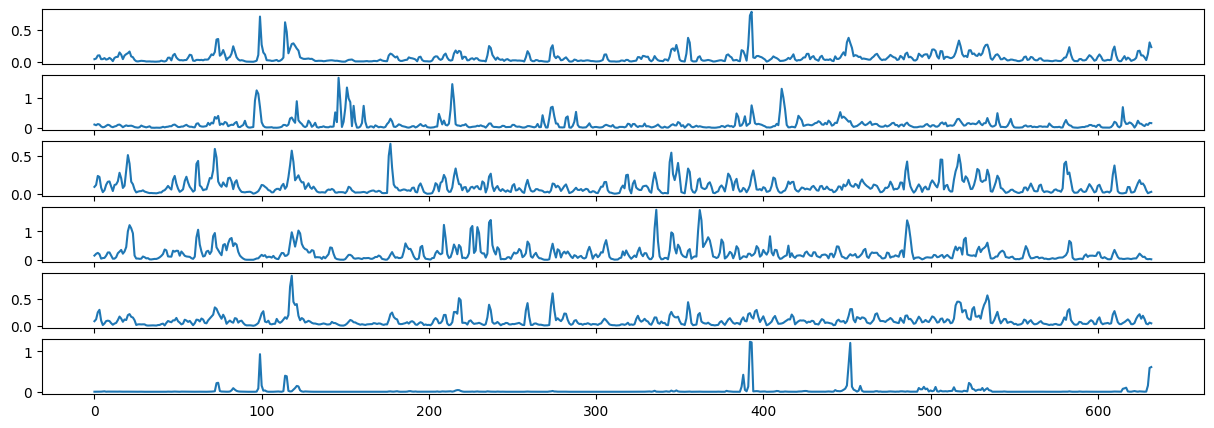

In [1157]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(611)
plt.plot(df_sum_spectrum['acc_x'])
ax = fig.add_subplot(612)
plt.plot(df_sum_spectrum['acc_y'])
ax = fig.add_subplot(613)
plt.plot(df_sum_spectrum['acc_z'])
ax = fig.add_subplot(614)
plt.plot(df_sum_spectrum['gyr_x'])
ax = fig.add_subplot(615)
plt.plot(df_sum_spectrum['gyr_y'])
ax = fig.add_subplot(616)
plt.plot(df_sum_spectrum['gyr_z'])

In [1158]:
# Interpolate the GPS data to fit for the spectrum data size

for j in ['lat','lon']:
    xp = df[j][:-2]
    cs = CubicSpline(summed,xp)
    df_sum_spectrum[j] = cs(t)

<Axes: xlabel='lon', ylabel='lat'>

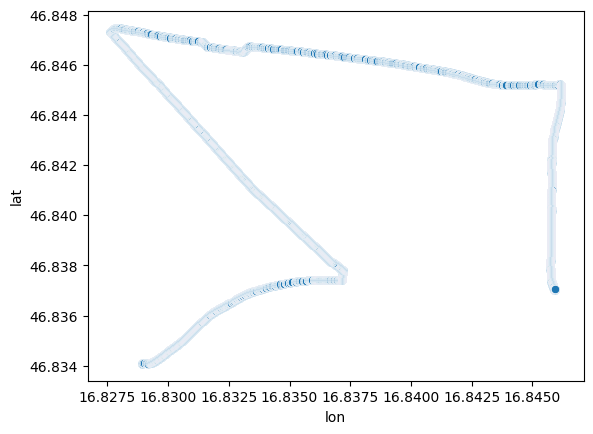

In [1159]:
sns.scatterplot(df_spatial, x='lon',y='lat')

In [1160]:
fig = px.scatter_mapbox(lat=df_sum_spectrum[df_sum_spectrum['acc_z'] < 0.2]['lat'], lon=df_sum_spectrum[df_sum_spectrum['acc_z'] < 0.2]['lon'], color= df_sum_spectrum[df_sum_spectrum['acc_z'] < 0.2]['acc_z'], zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn_r)
#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(
    style="light", 
    accesstoken='pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw',
    pitch=0,
    zoom=5
    )
)

fig.show()

### Aggressive maneuver detection

In [1161]:
from scipy.signal import find_peaks

In [1162]:
# Aggressive maneuver are represented by the acc_x and the gyr_z variables
    # See the above correlation map
    # And the sensor orientation
    
df_sum_spectrum[['acc_x','gyr_z']].describe()

,acc_x,gyr_z
count,633.000000,633.000000
mean,0.066837,0.023238
std,0.083644,0.107082
min,0.001292,0.000161
25%,0.018114,0.001041
50%,0.038079,0.002407
75%,0.085014,0.007647
max,0.777914,1.238785


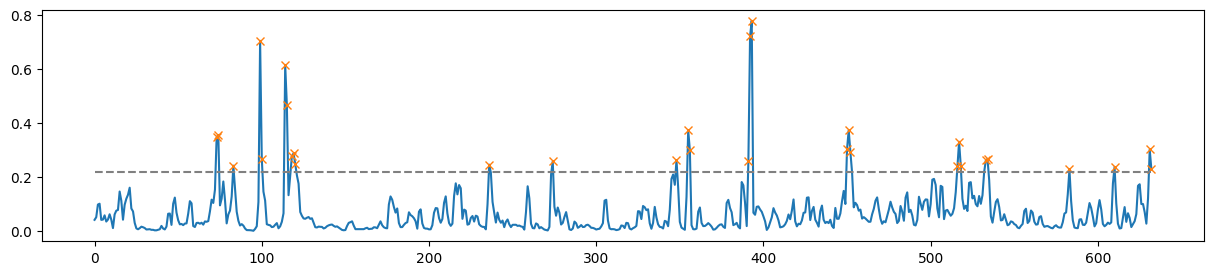

In [1163]:
# Find aggressive turnings in acc_x
#peaks_accx, _ = find_peaks(df_sum_spectrum['acc_x'], height=0.22)
peaks_accx = df_sum_spectrum[df_sum_spectrum['acc_x'] > 0.22].index

plt.figure(figsize=(15,3))
plt.plot(df_sum_spectrum['acc_x'])
plt.plot(peaks_accx, df_sum_spectrum['acc_x'][peaks_accx], "x")
plt.plot(np.zeros_like(df_sum_spectrum['acc_x'])+0.22, "--", color="gray")
plt.show()

In [1164]:
fig = px.scatter_mapbox(lat=df_sum_spectrum['lat'][peaks_accx], lon=df_sum_spectrum['lon'][peaks_accx], zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn_r)
#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(
    style="light", 
    accesstoken='pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw',
    pitch=0,
    zoom=5
    )
)

fig.show()

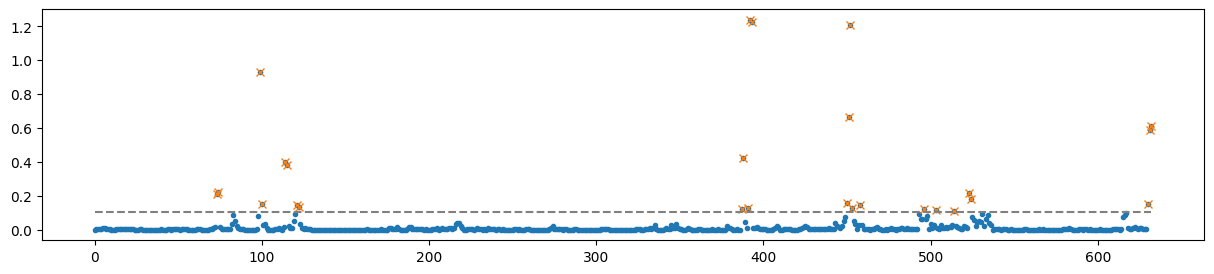

In [1165]:
# Find aggressive turnings in gyr_z

#peaks_gyrz, _ = find_peaks(df_sum_spectrum['gyr_z'], height = np.std(df_sum_spectrum['gyr_z']), distance=1)
peaks_gyrz = df_sum_spectrum[df_sum_spectrum['gyr_z'] > np.std(df_sum_spectrum['gyr_z'])].index

plt.figure(figsize=(15,3))
plt.plot(df_sum_spectrum['gyr_z'],'.')
plt.plot(peaks_gyrz, df_sum_spectrum['gyr_z'][peaks_gyrz], "x")
plt.plot(np.zeros_like(df_sum_spectrum['gyr_z']) + np.std(df_sum_spectrum['gyr_z']), "--", color="gray")
plt.show()

In [1166]:
fig = px.scatter_mapbox(lat=df_sum_spectrum['lat'][peaks_gyrz], lon=df_sum_spectrum['lon'][peaks_gyrz], zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn_r)
#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(
    style="light", 
    accesstoken='pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw',
    pitch=0,
    zoom=5
    )
)

fig.show()

In [1167]:
peaks = pd.concat([pd.DataFrame(peaks_accx), pd.DataFrame(peaks_gyrz)], join="outer", ignore_index=True).drop_duplicates()[0]
peaks # Location indexes of aggressive turnings

0      73
1      74
2      83
3      99
4     100
5     114
6     115
7     118
8     119
9     120
10    236
11    274
12    348
13    355
14    356
15    391
16    392
17    393
18    450
19    451
20    452
21    516
22    517
23    518
24    533
25    534
26    583
27    610
28    631
29    632
36    121
37    122
38    387
39    388
46    453
47    458
48    496
49    503
50    514
51    523
52    524
53    630
Name: 0, dtype: int64

In [1168]:
fig = px.scatter_mapbox(lat=df_sum_spectrum['lat'][peaks], lon=df_sum_spectrum['lon'][peaks], zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn_r)
#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(
    style="light", 
    accesstoken='pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw',
    pitch=0,
    zoom=5
    )
)

fig.show()

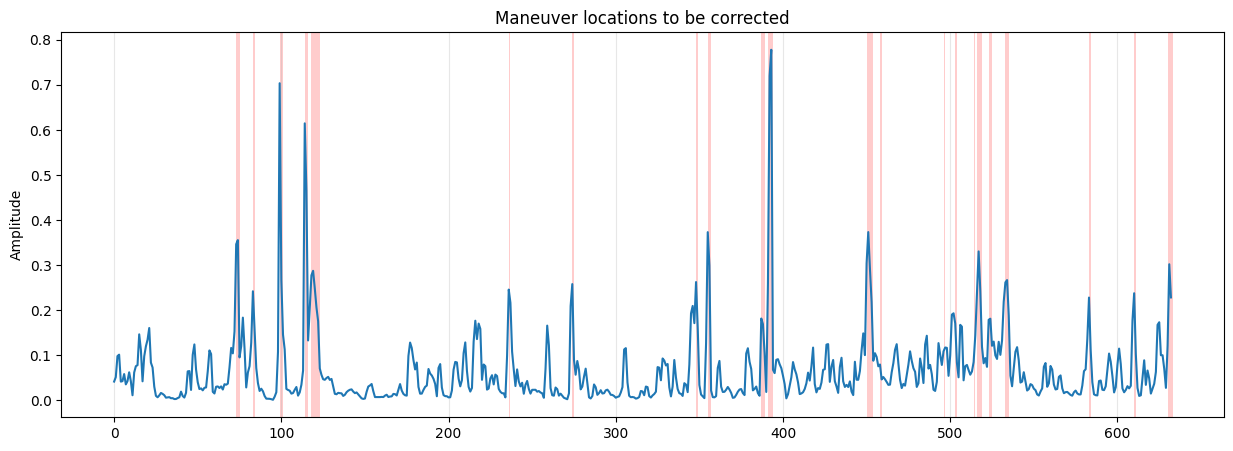

In [1169]:
ax = df_sum_spectrum['acc_x'].plot(figsize=(15, 5), use_index=False, ylabel='Amplitude')
ax.grid(axis='x', alpha=0.3)
plt.title('Maneuver locations to be corrected')

# Highlight aggressive turning maneuvers
for peak in zip(peaks):
    ax.axvspan(peak[0], peak[0]+1, facecolor='red', alpha=.2)

#### Correction

In [1170]:
df_sum_spectrum_corrected = df_sum_spectrum.copy()

In [1171]:
df_sum_spectrum_corrected['acc_x'][peaks] = df_sum_spectrum['acc_x'].median()

In [1172]:
df_sum_spectrum_corrected['gyr_z'].loc[peaks] = df_sum_spectrum['gyr_z'].median()

## Correct lognormal distribution and normalization

In [1173]:
# skewed data, lognormal distribution

#df_sum_spectrum_corrected['acc_x'].plot(kind='hist', bins=50)

- with PowerTransformer

In [1174]:
#from sklearn.preprocessing import MinMaxScaler

In [1175]:
"""
scaler = MinMaxScaler(feature_range=(0.0000000001,1))
df_scaled = scaler.fit_transform(df_sum_spectrum_corrected[['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']])
"""

"\nscaler = MinMaxScaler(feature_range=(0.0000000001,1))\ndf_scaled = scaler.fit_transform(df_sum_spectrum_corrected[['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']])\n"

In [1176]:
"""
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox', standardize=False)
df_rescaled = pt.fit_transform(df_scaled)
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer
# https://scikit-learn.org/stable/modules/preprocessing.html
# """

"\nfrom sklearn.preprocessing import PowerTransformer\npt = PowerTransformer(method='box-cox', standardize=False)\ndf_rescaled = pt.fit_transform(df_scaled)\n# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer\n# https://scikit-learn.org/stable/modules/preprocessing.html\n# "

In [1177]:
#plt.hist(df_rescaled[:,3], bins=50);  #acc_z axis

In [1178]:
#plt.plot(df_rescaled[:,3])

- with standard deviation based outlier removal

In [1179]:
"""
plt.figure(figsize=(15,3))
plt.plot(df_rescaled[:,0])
plt.plot((np.zeros_like(df_rescaled[:,0])+df_rescaled[:,0].mean()) + df_rescaled[:,0].std()*3.5, "--", color="gray")
plt.plot((np.zeros_like(df_rescaled[:,0])+df_rescaled[:,0].mean()) - df_rescaled[:,0].std()*3.5, "--", color="gray")
plt.show()
"""

'\nplt.figure(figsize=(15,3))\nplt.plot(df_rescaled[:,0])\nplt.plot((np.zeros_like(df_rescaled[:,0])+df_rescaled[:,0].mean()) + df_rescaled[:,0].std()*3.5, "--", color="gray")\nplt.plot((np.zeros_like(df_rescaled[:,0])+df_rescaled[:,0].mean()) - df_rescaled[:,0].std()*3.5, "--", color="gray")\nplt.show()\n'

In [1180]:
"""
df_outliers_removed = pd.DataFrame(df_rescaled).copy()
for vars in df_outliers_removed:
    df_outliers_removed[vars][df_outliers_removed[vars] > (df_outliers_removed[vars].mean() + df_outliers_removed[vars].std()*3.5)] = (df_outliers_removed[vars].mean() + df_outliers_removed[vars].std()*3.5)
    df_outliers_removed[vars][df_outliers_removed[vars] < (df_outliers_removed[vars].mean() - df_outliers_removed[vars].std()*3.5)] = (df_outliers_removed[vars].mean() - df_outliers_removed[vars].std()*3.5)
"""

'\ndf_outliers_removed = pd.DataFrame(df_rescaled).copy()\nfor vars in df_outliers_removed:\n    df_outliers_removed[vars][df_outliers_removed[vars] > (df_outliers_removed[vars].mean() + df_outliers_removed[vars].std()*3.5)] = (df_outliers_removed[vars].mean() + df_outliers_removed[vars].std()*3.5)\n    df_outliers_removed[vars][df_outliers_removed[vars] < (df_outliers_removed[vars].mean() - df_outliers_removed[vars].std()*3.5)] = (df_outliers_removed[vars].mean() - df_outliers_removed[vars].std()*3.5)\n'

In [1181]:

"""
fig = px.scatter_mapbox(lat=df_sum_spectrum['lat'], lon=df_sum_spectrum['lon'], color = df_outliers_removed[3], zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn_r)
#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(
    style="light", 
    accesstoken='pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw',
    pitch=0,
    zoom=5
    )
)

fig.show()
"""

'\nfig = px.scatter_mapbox(lat=df_sum_spectrum[\'lat\'], lon=df_sum_spectrum[\'lon\'], color = df_outliers_removed[3], zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn_r)\n#fig.update_geos(scope=\'europe\')\nfig.update_geos(fitbounds="locations")\nfig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})\n#fig.update_layout(mapbox_style="open-street-map")\nfig.update_layout(\n    mapbox=dict(\n    style="light", \n    accesstoken=\'pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw\',\n    pitch=0,\n    zoom=5\n    )\n)\n\nfig.show()\n'

# Segmentation

In [1182]:
import ruptures as rpt

In [1183]:
"""
# detection with https://centre-borelli.github.io/ruptures-docs/code-reference/detection/pelt-reference/ 

#algo = rpt.Dynp(model="l2").fit(df_outliers_removed[0].to_numpy())
#result = algo.predict(n_bkps=40)

algo = rpt.Pelt().fit(df_outliers_removed[2].to_numpy())
result = algo.predict(1) #original pen=1
result[:5]
"""

'\n# detection with https://centre-borelli.github.io/ruptures-docs/code-reference/detection/pelt-reference/ \n\n#algo = rpt.Dynp(model="l2").fit(df_outliers_removed[0].to_numpy())\n#result = algo.predict(n_bkps=40)\n\nalgo = rpt.Pelt().fit(df_outliers_removed[2].to_numpy())\nresult = algo.predict(1) #original pen=1\nresult[:5]\n'

In [1184]:
df_sum_spectrum_corrected.columns

Index(['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'lat', 'lon'], dtype='object')

In [1185]:
# detection with https://centre-borelli.github.io/ruptures-docs/code-reference/detection/pelt-reference/ 

#algo = rpt.Dynp(model="l2").fit(df_outliers_removed[0].to_numpy())
#result = algo.predict(n_bkps=40)

algo = rpt.Pelt().fit(df_sum_spectrum_corrected[['acc_y', 'acc_z', 'gyr_x', 'gyr_y']].to_numpy())
result = algo.predict(0.01) #original pen=1
result[:5]

[5, 15, 20, 25, 40]

<Axes: >

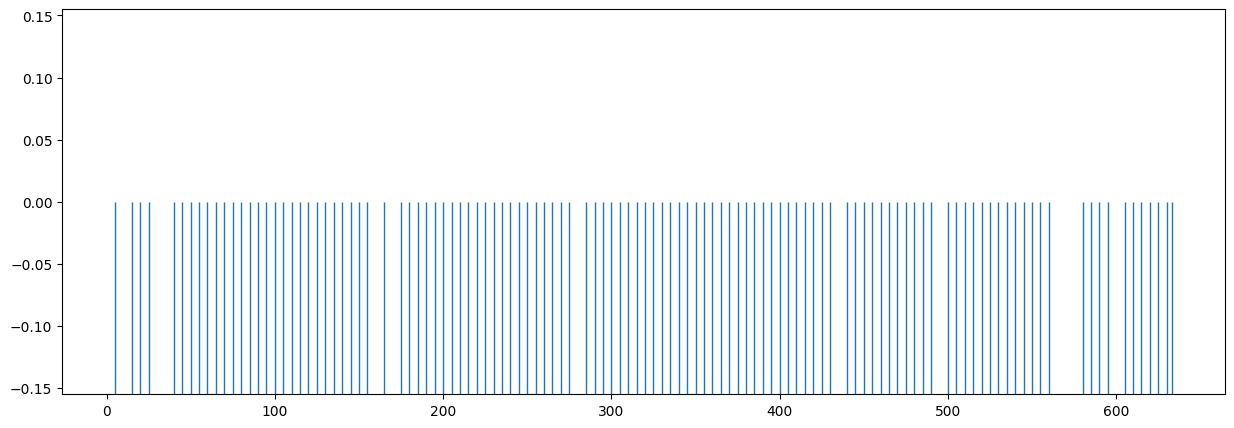

In [1186]:
# Plot the section boudaries
plt.figure(figsize=(15,5))
sns.rugplot(result, height=0.5)

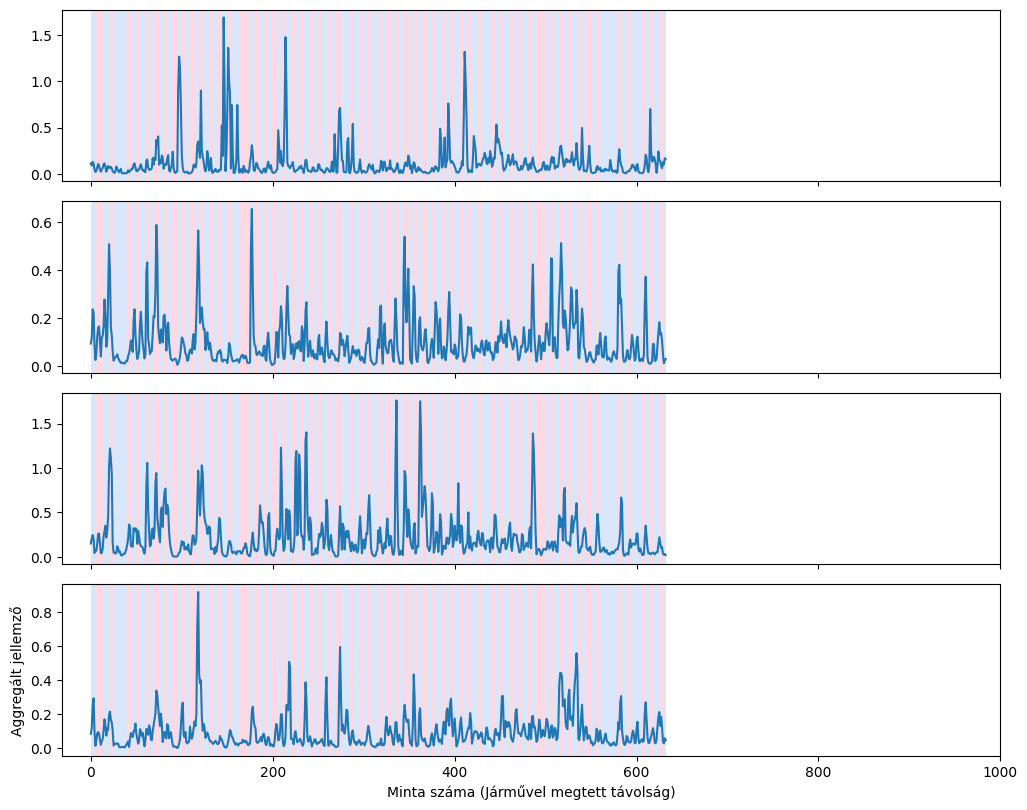

In [1187]:
# display segmentation
rpt.display(df_sum_spectrum_corrected[['acc_y', 'acc_z', 'gyr_x', 'gyr_y']].to_numpy(), result)
plt.xlabel('Minta száma (Járművel megtett távolság)')
plt.ylabel('Aggregált jellemző')
plt.xlim(right=1000)
plt.show()

In [1188]:
from scipy import stats

def calculate_mean_vector(df, breakpoints): #mean
    vector = np.zeros(len(df))
    for i in range(len(breakpoints) - 1):
        start = breakpoints[i]
        end = breakpoints[i + 1]
        segment = df.iloc[start:end]
        value = segment.mean()
        vector[start:end] = value
    return vector

def calculate_var_vector(df, breakpoints): #variance
    vector = np.zeros(len(df))
    for i in range(len(breakpoints) - 1):
        start = breakpoints[i]
        end = breakpoints[i + 1]
        segment = df.iloc[start:end]
        value = segment.var()
        vector[start:end] = value
    return vector

def calculate_std_vector(df, breakpoints): #std
    vector = np.zeros(len(df))
    for i in range(len(breakpoints) - 1):
        start = breakpoints[i]
        end = breakpoints[i + 1]
        segment = df.iloc[start:end]
        value = segment.std()
        vector[start:end] = value
    return vector

def calculate_median_vector(df, breakpoints): #median
    vector = np.zeros(len(df))
    for i in range(len(breakpoints) - 1):
        start = breakpoints[i]
        end = breakpoints[i + 1]
        segment = df.iloc[start:end]
        value = segment.median()
        vector[start:end] = value
    return vector

#rms
#rms = np.sqrt(np.mean(y**2))
def calculate_rms_vector(df, breakpoints): #median
    vector = np.zeros(len(df))
    for i in range(len(breakpoints) - 1):
        start = breakpoints[i]
        end = breakpoints[i + 1]
        segment = df.iloc[start:end]
        value = np.sqrt(np.mean(segment**2))
        vector[start:end] = value
    return vector


def calculate_entropy_vector(df, breakpoints): #entropy
    vector = np.zeros(len(df))
    for i in range(len(breakpoints) - 1):
        start = breakpoints[i]
        end = breakpoints[i + 1]
        segment = df.iloc[start:end]
        value = stats.entropy(segment)
        vector[start:end] = value
    return vector

def calculate_kurtosis_vector(df, breakpoints): #kurtosis
    vector = np.zeros(len(df))
    for i in range(len(breakpoints) - 1):
        start = breakpoints[i]
        end = breakpoints[i + 1]
        segment = df.iloc[start:end]
        value = stats.kurtosis(segment)
        vector[start:end] = value
    return vector


def calculate_len_vector(df, breakpoints): #length
    vector = np.zeros(len(df))
    for i in range(len(breakpoints) - 1):
        start = breakpoints[i]
        end = breakpoints[i + 1]
        segment = df.iloc[start:end]
        value = len(segment)
        vector[start:end] = value
    return vector

def calculate_spikiness_vector(df, breakpoints): #spikiness
    vector = np.zeros(len(df))
    for i in range(len(breakpoints) - 1):
        start = breakpoints[i]
        end = breakpoints[i + 1]
        segment = df.iloc[start:end]
        value = np.var(np.diff(segment))
        vector[start:end] = value
    return vector

import statsmodels.api as sm

def calculate_stability_vector(df, breakpoints): #spikiness
    vector = np.zeros(len(df))
    for i in range(len(breakpoints) - 1):
        start = breakpoints[i]
        end = breakpoints[i + 1]
        segment = df.iloc[start:end]
        value = np.median(sm.tsa.acf(segment, nlags=10))
        vector[start:end] = value
    return vector


In [1189]:
# Generate new values for feature space
"""
df_outliers_removed.columns = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']

df_features = df_outliers_removed.copy()
df_features['mean'] = calculate_mean_vector(df_outliers_removed[2], result)
df_features['std'] = calculate_std_vector(df_outliers_removed[2], result)
df_features['var'] = calculate_var_vector(df_outliers_removed[2], result)
df_features['median'] = calculate_median_vector(df_outliers_removed[2], result)
df_features['rms'] = calculate_rms_vector(df_outliers_removed[2], result)
df_features['kurtosis'] = calculate_kurtosis_vector(df_outliers_removed[2], result)
df_features['length'] = calculate_len_vector(df_outliers_removed[2], result)
df_features['spikiness'] = calculate_spikiness_vector(df_outliers_removed[2], result)
df_features['stability'] = calculate_stability_vector(df_outliers_removed[2], result)
"""

"\ndf_outliers_removed.columns = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']\n\ndf_features = df_outliers_removed.copy()\ndf_features['mean'] = calculate_mean_vector(df_outliers_removed[2], result)\ndf_features['std'] = calculate_std_vector(df_outliers_removed[2], result)\ndf_features['var'] = calculate_var_vector(df_outliers_removed[2], result)\ndf_features['median'] = calculate_median_vector(df_outliers_removed[2], result)\ndf_features['rms'] = calculate_rms_vector(df_outliers_removed[2], result)\ndf_features['kurtosis'] = calculate_kurtosis_vector(df_outliers_removed[2], result)\ndf_features['length'] = calculate_len_vector(df_outliers_removed[2], result)\ndf_features['spikiness'] = calculate_spikiness_vector(df_outliers_removed[2], result)\ndf_features['stability'] = calculate_stability_vector(df_outliers_removed[2], result)\n"

In [1190]:
# Calculate std and median features for all variables, as these features were the most representative of the information content 

df_features = pd.DataFrame()
for i in ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']:
    df_features['std_' + i] = calculate_std_vector(df_sum_spectrum_corrected[i], result)
    df_features['median_' + i] = calculate_median_vector(df_sum_spectrum_corrected[i], result)
df_features = df_features.iloc[10:]

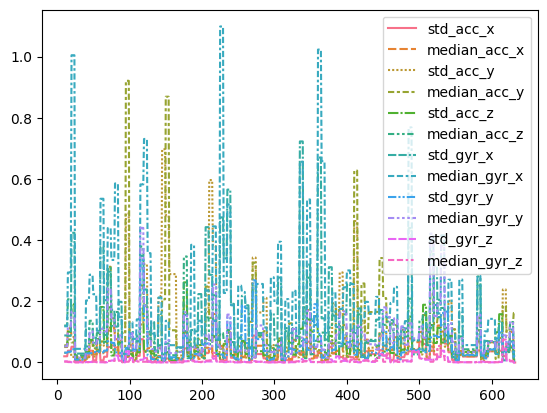

In [1191]:
sns.lineplot(df_features)
plt.legend()

## PCA

In [1192]:
df_features.columns

Index(['std_acc_x', 'median_acc_x', 'std_acc_y', 'median_acc_y', 'std_acc_z',
       'median_acc_z', 'std_gyr_x', 'median_gyr_x', 'std_gyr_y',
       'median_gyr_y', 'std_gyr_z', 'median_gyr_z'],
      dtype='object')

In [1193]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_features)
df_pca = pd.DataFrame(pca.transform(df_features))

[0.52338646 0.76922017 0.85030817 0.90936289 0.9590798  0.97432177
 0.98580275 0.99174602 0.99742963 0.99895192 0.99986151 1.        ]


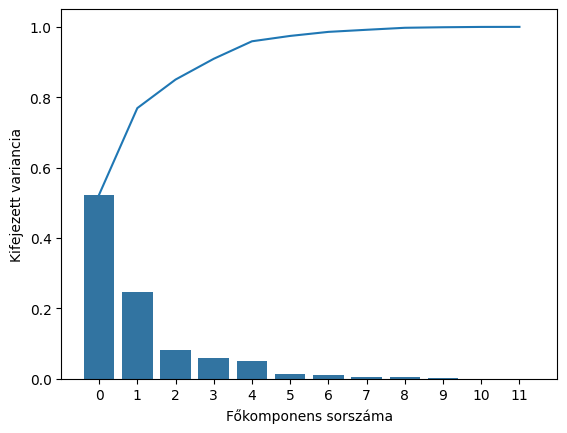

In [1194]:
sns.barplot(x=np.arange(0,len(pca.explained_variance_ratio_)),y=pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Főkomponens sorszáma')
plt.ylabel('Kifejezett variancia')

print(pca.explained_variance_ratio_.cumsum())

In [1195]:
from sklearn.preprocessing import MinMaxScaler

<Axes: xlabel='0', ylabel='Count'>

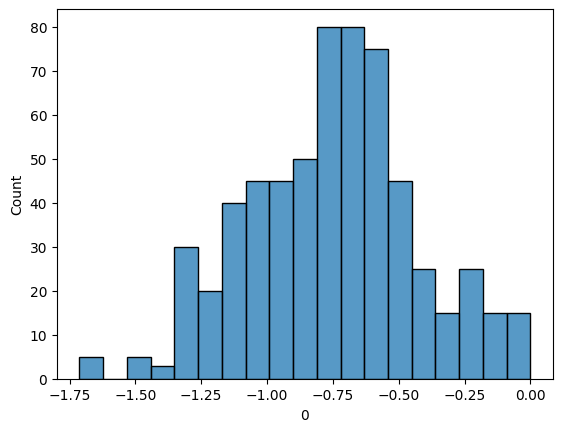

In [1196]:
# lognormal to normal distribution for plot map
sns.histplot(np.log10(pd.DataFrame(MinMaxScaler(feature_range=(0,1)).fit_transform(df_pca))[0]))

In [1197]:
fig = px.scatter_mapbox(lat=df_sum_spectrum[10:]['lat'], lon=df_sum_spectrum[10:]['lon'], 
                        color = np.log10(pd.DataFrame(MinMaxScaler(feature_range=(0,1)).fit_transform(df_pca))[0])
                        , zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn_r)
#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(
    style="light", 
    accesstoken='pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw',
    pitch=0,
    zoom=5
    )
)

fig.show()

In [1198]:
# Reduce the number of dimensions to 4

df_pca.drop(labels=np.linspace(4,11,8), axis=1, inplace=True)

(-0.5, 2.0)

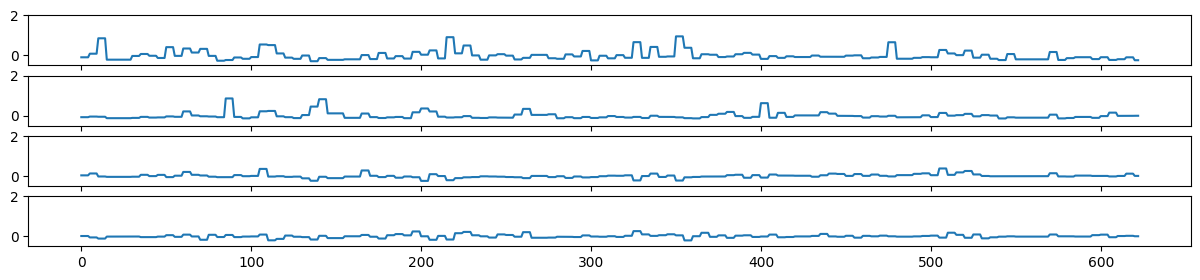

In [1199]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(411)
plt.plot(df_pca[0])
plt.ylim(bottom=-0.5, top=2)
ax = fig.add_subplot(412)
plt.plot(df_pca[1])
plt.ylim(bottom=-0.5, top=2)
ax = fig.add_subplot(413)
plt.plot(df_pca[2])
plt.ylim(bottom=-0.5, top=2)
ax = fig.add_subplot(414)
plt.plot(df_pca[3])
plt.ylim(bottom=-0.5, top=2)

In [1200]:
df_pca

,0,1,2,3
0,-0.091960,-0.073282,0.030435,0.011073
1,-0.091960,-0.073282,0.030435,0.011073
2,-0.091960,-0.073282,0.030435,0.011073
3,-0.091960,-0.073282,0.030435,0.011073
4,-0.091960,-0.073282,0.030435,0.011073
...,...,...,...,...
618,-0.092935,-0.005249,0.115181,0.020808
619,-0.092935,-0.005249,0.115181,0.020808
620,-0.237568,-0.002274,0.004139,-0.000557
621,-0.237568,-0.002274,0.004139,-0.000557


#### Export the data

In [1201]:
to_export = pd.DataFrame([df_sum_spectrum['lat'].iloc[10:], df_sum_spectrum['lon'].iloc[10:]]).T
to_export = pd.concat([to_export.reset_index(drop=True), df_features.reset_index(drop=True)], axis=1)
to_export

,lat,lon,std_acc_x,median_acc_x,std_acc_y,median_acc_y,std_acc_z,median_acc_z,std_gyr_x,median_gyr_x,std_gyr_y,median_gyr_y,std_gyr_z,median_gyr_z
0,46.834450,16.829852,0.020208,0.050554,0.031671,0.056211,0.052449,0.120786,0.088344,0.118258,0.031982,0.052838,0.003408,0.002875
1,46.834476,16.829888,0.020208,0.050554,0.031671,0.056211,0.052449,0.120786,0.088344,0.118258,0.031982,0.052838,0.003408,0.002875
2,46.834508,16.829928,0.020208,0.050554,0.031671,0.056211,0.052449,0.120786,0.088344,0.118258,0.031982,0.052838,0.003408,0.002875
3,46.834529,16.829954,0.020208,0.050554,0.031671,0.056211,0.052449,0.120786,0.088344,0.118258,0.031982,0.052838,0.003408,0.002875
4,46.834566,16.829996,0.020208,0.050554,0.031671,0.056211,0.052449,0.120786,0.088344,0.118258,0.031982,0.052838,0.003408,0.002875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,46.837288,16.845814,0.053263,0.100065,0.036298,0.126899,0.048740,0.132252,0.068991,0.107431,0.066466,0.132218,0.003445,0.005305
619,46.837250,16.845828,0.053263,0.100065,0.036298,0.126899,0.048740,0.132252,0.068991,0.107431,0.066466,0.132218,0.003445,0.005305
620,46.837180,16.845851,0.000000,0.038079,0.037242,0.161786,0.009123,0.022509,0.005173,0.021438,0.015134,0.047412,0.000000,0.002407
621,46.837117,16.845877,0.000000,0.038079,0.037242,0.161786,0.009123,0.022509,0.005173,0.021438,0.015134,0.047412,0.000000,0.002407


In [1202]:
"""
to_export = pd.DataFrame([df_sum_spectrum['lat'].iloc[10:], df_sum_spectrum['lon'].iloc[10:]]).T
to_export = pd.concat([to_export.reset_index(drop=True), df_pca.reset_index(drop=True)], axis=1)
to_export
"""

"\nto_export = pd.DataFrame([df_sum_spectrum['lat'].iloc[10:], df_sum_spectrum['lon'].iloc[10:]]).T\nto_export = pd.concat([to_export.reset_index(drop=True), df_pca.reset_index(drop=True)], axis=1)\nto_export\n"

In [1203]:
to_export.to_csv('./../../data-cleaned-unsupervised/'+file_name+'.csv', index=False, mode='x')